# Campaign Finances in the 2016 and 2020 Presidential Elections
## Megan Chang, Dan Edie, and Nicholas Prentkowski

It is no secret that the cost of running for the office of President of the United States has increased over the past few election cylces. But how much? Are the most populous states contributing the most money? Our group used the Federal Election Commission's API in order to pull data on campaign receipts, as well as the number of votes each candidate received, stored in MIT's Election Lab database. We found that the current election has already raised about twice as much as the previous election, though that is due to contributions by two specific candidates on the Democratic ticket.

Because the FEC API only returned data for the 2016 and 2020 Presidential bids, we focused specifically on these two elections, noting that the 2020 election is currently ongoing.

### Part I: How Much Money Did Each Candidate Raise in the 2016 Election?
#### Dan Edie

The FEC API can return the net receipts for a Presidential campaign. Net receipts are described as the amount of money a campaign has to spend, the "war chest" as sometimes described on the media.

Each candidate that files to run for the Office of President is included in the FEC commission API, even if the candidate does not actively campaign.

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib as plt

# FEC API Key
import sys
sys.path.insert(0, "/Users/Iceda/OneDrive/Desktop/ClassHomework/keys")
from config import fec_key

In [2]:
# Study data files
presidential_votes_path = "Megan/1976-2016-president.csv"

# Read the presidential votes csv
presidential_votes_data = pd.read_csv(presidential_votes_path)

In [3]:
# url to return presidential contributions received per candidate
cand_url = 'https://api.open.fec.gov/v1/presidential/contributions/by_candidate/'

# set the amount of data to be returned per page. Must be under 100
per_page = 50
election_year = '2016'

# params to pass into the url
params = {'api_key' : fec_key,
         'election_year' : election_year,
         'per_page' : per_page}

# first json request to get the number of pages to loop through
cand_search = requests.get(cand_url, params=params).json()

# stores the number of pages the search returns
page_nums = cand_search['pagination']['pages']

# print out the json return for use in extracting data
# print(json.dumps(cand_search, indent=4))

In [4]:
# creating lists to store the data to pass to a dataframe
id_list = []
net_rec_list = []
contr_state_list = []
can_last_name = []
can_party = []

# loops through how many pages the data has returned. This is dependent on the number of results
# per page set before
for page in range(1, page_nums):
    params['page'] = page
    cand_data = requests.get(cand_url, params=params)
    cand_data = cand_data.json()
    
    # loop through however many results there will be per page and append the lists with data
    for result in range(0, per_page):
        try:
            id_list.append(cand_data['results'][result]['candidate_id'])
            net_rec_list.append(cand_data['results'][result]['rounded_net_receipts'])
            contr_state_list.append(cand_data['results'][result]['contributor_state'])
            can_last_name.append(cand_data['results'][result]['candidate_last_name'])
            can_party.append(cand_data['results'][result]['candidate_party_affiliation'])
            print("Data appended")
        except:
            print("Data out of range/not found...")

Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data a

Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data a

Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data a

In [5]:
# creating the dataframe and populating it
pres_finance = pd.DataFrame({'candidate_id' : id_list,
                             'candidate_party' : can_party,
                             'candidate_last_name' : can_last_name,
                            'rounded_net_receipts' : net_rec_list,
                           'contributor_state' : contr_state_list})
pres_finance.to_csv("output/pres_finance_data.csv", index = False)
pres_finance

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
0,P00000001,None,All candidates,1462.3,US
1,P00000002,DEM,Democrats,799.4,US
2,P00000003,REP,Republicans,639.1,US
3,P00003392,DEM,Clinton,563.8,US
4,P80001571,REP,Trump,333.1,US
...,...,...,...,...,...
1645,P00000002,DEM,Democrats,0.0,KE
1646,P00003392,DEM,Clinton,0.0,BE
1647,P00000001,None,All candidates,0.0,BE
1648,P00000002,DEM,Democrats,0.0,BE


In [ ]:
# load the dataframe as needed
pres_finance = pd.read_csv('output/pres_finance_data.csv')
pres_finance

In [6]:
# focusing only on the national totals. If state = US, then that is national
total_election = pres_finance.loc[pres_finance['contributor_state'] == 'US']
total_election

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
0,P00000001,None,All candidates,1462.3,US
1,P00000002,DEM,Democrats,799.4,US
2,P00000003,REP,Republicans,639.1,US
3,P00003392,DEM,Clinton,563.8,US
4,P80001571,REP,Trump,333.1,US
5,P60007168,DEM,Sanders,228.2,US
12,P60006111,REP,Cruz,90.2,US
14,P60005915,REP,Carson,63.6,US
17,P60006723,REP,Rubio,42.1,US
19,P60008059,REP,Bush,34.1,US


In [7]:
# now pulling the democratic receipts for 2016 election
total_dem = pres_finance.loc[pres_finance['candidate_party'] == 'DEM']
overall_total_dem = total_dem.loc[total_dem['contributor_state'] == 'US']
overall_total_dem

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
1,P00000002,DEM,Democrats,799.4,US
3,P00003392,DEM,Clinton,563.8,US
5,P60007168,DEM,Sanders,228.2,US
110,P60007671,DEM,O'Malley,5.7,US
286,P60009685,DEM,Lessig,1.0,US
332,P60008885,DEM,Webb,0.8,US


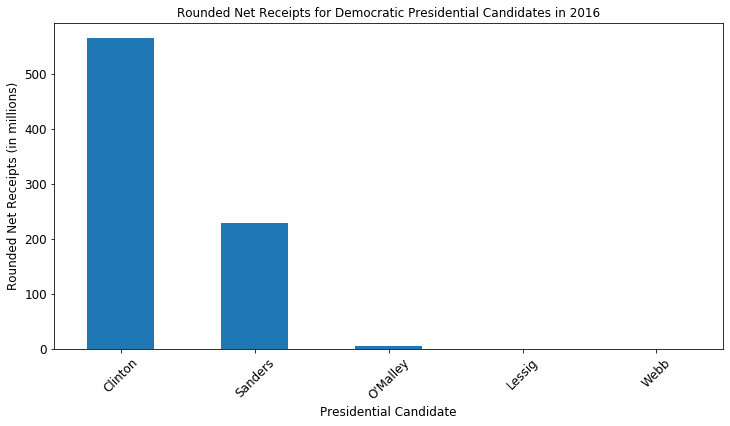

In [8]:
# creating a plot for overall receipts each dem candidate got in 2016
dem_overall = total_dem.loc[(total_dem['contributor_state'] == 'US') & 
                                (total_dem['candidate_last_name'] != 'Democrats')]
dem_overall.plot(x = 'candidate_last_name', y = 'rounded_net_receipts', kind = 'bar', figsize=(12, 6),
                  title= 'Rounded Net Receipts for Democratic Presidential Candidates in 2016',
                  legend=False, fontsize=12, rot=45)
plt.pyplot.ylabel("Rounded Net Receipts (in millions)", fontsize=12)
plt.pyplot.xlabel("Presidential Candidate", fontsize=12)
plt.pyplot.savefig('output/dem_net_receipts.png')

The plot above shows the overall cash Democratic candidates raised in the 2016 election. Bernie Sanders was Hillary Clinton's main challenger during the primary, and lasted longest against her. Martin O'Malley suspended his campaign after the first primary in Iowa, and the remaining two candidates, Lawrence Lessig and Jim Webb, each ended their campaigns in 2015.

In [9]:
# now the total receipts for the Republican party in 2016
total_repub = pres_finance.loc[pres_finance['candidate_party'] == 'REP']
overall_tot_repub = total_repub.loc[total_repub['contributor_state'] == 'US']
overall_tot_repub

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
2,P00000003,REP,Republicans,639.1,US
4,P80001571,REP,Trump,333.1,US
12,P60006111,REP,Cruz,90.2,US
14,P60005915,REP,Carson,63.6,US
17,P60006723,REP,Rubio,42.1,US
19,P60008059,REP,Bush,34.1,US
40,P60003670,REP,Kasich,18.9,US
63,P40003576,REP,Paul,12.1,US
64,P60007242,REP,Fiorina,12.1,US
78,P60006046,REP,Walker,9.0,US


Republicans had a crowded primary in the 2016 election with 17 candidates filing for the election. Unlike the Democratic data, the Republican primary was highly contentious and the amount each candidate raised does not match when they dropped out of the race. For example, the last candidate to drop was John Kasich. Ben Carson suspended his campaign before Jeb Bush, and both of them had suspended before the convention.

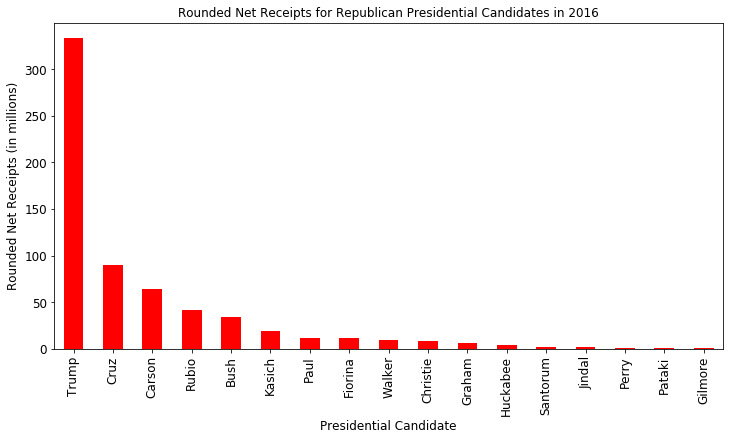

In [10]:
# plotting overall Republican receipts
repub_overall = total_repub.loc[(total_repub['contributor_state'] == 'US') & 
                                (total_repub['candidate_last_name'] != 'Republicans')]
repub_overall.plot(x = 'candidate_last_name', y = 'rounded_net_receipts', kind='bar', figsize=(12, 6),
                  title= 'Rounded Net Receipts for Republican Presidential Candidates in 2016',
                  legend=False, color='Red', fontsize=12)
plt.pyplot.ylabel("Rounded Net Receipts (in millions)", fontsize=12)
plt.pyplot.xlabel("Presidential Candidate", fontsize=12)
plt.pyplot.savefig('output/repub_net_receipts.png')

In [11]:
# last, getting the receipts for Independent candidates
total_ind = pres_finance.loc[(pres_finance['candidate_party'] != 'DEM') &
                            (pres_finance['candidate_party'] != 'REP')]
total_ind = total_ind.dropna()
overall_total_ind = total_ind.loc[total_ind['contributor_state'] == 'US']
overall_total_ind

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
66,P20002671,LIB,Johnson,11.6,US
70,P20003984,GRE,Stein,10.5,US
241,P60022654,IND,McMullin,1.6,US


How did candidates who ran as independents fair? We see that both Gary Johnson and Jill Stein did nominally well, each raising \\$11 and \\$10 million dollars, respectively. This is more than twelve other candidates in the major parties, though those candidates had dropped from their races early on in the election cycle.

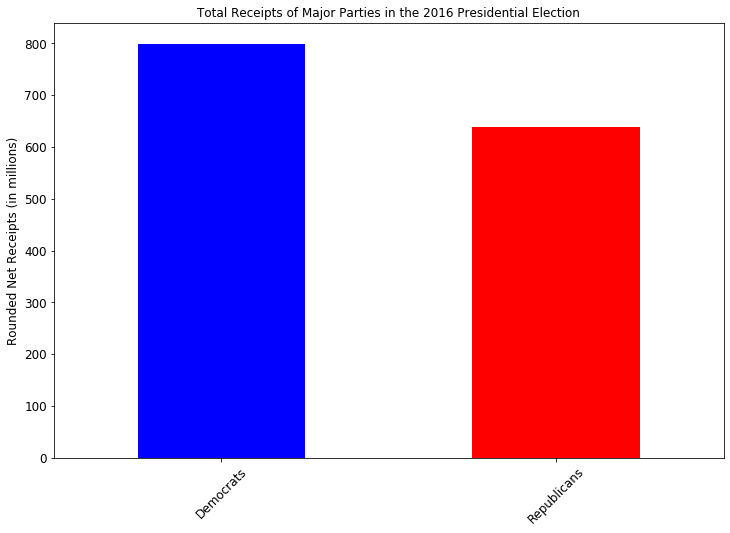

In [12]:
# Plotting the major party receipts in 2016
ax = total_election.iloc[1:3].plot(y='rounded_net_receipts', kind='bar', legend = False, rot=45, 
                                   title='Total Receipts of Major Parties in the 2016 Presidential Election',
                                  figsize = (12,8), fontsize=12, color=['Blue', 'Red'])
plt.pyplot.ylabel("Rounded Net Receipts (in millions)", fontsize=12)
ax.set_xticklabels(['Democrats', 'Republicans'])
plt.pyplot.savefig('output/maj_party_receipts_2016.png')

Looking at the overall money raised by the major parties, we see the Democratic party was able to collect more money than the Republican party by about \\$200 million dollars. With the outcome of the election, it is not always the case where the party that spends more money wins the election. It should be noted, however, that Hillary Clinton did win the popular vote versus the electoral college.

## What is the Current State of Spending in the 2020 Election?

Has the amount of money each party has raised stayed more or less consistent during the 2020 Election? We would assume that the Democratic party would be trying to collect more money at this point since Trump is the incumbent, but what are the current totals? Notably, there are two Democratic candidates that ran who are billionares. How have they impacted the net receipts?

In [13]:
# first json request to get the number of pages to loop through
cand_search = requests.get(cand_url, params=params).json()

# changing to the 2020 election and reloading the parameters accordingly
election_year = '2020'

params = {'api_key' : fec_key,
         'election_year' : election_year,
         'per_page' : per_page}

# stores the number of pages the search returns
page_nums = cand_search['pagination']['pages']

# print(json.dumps(cand_search, indent=4))

In [14]:
# creating lists to store the data to pass to a dataframe
id_list = []
net_rec_list = []
contr_state_list = []
can_last_name = []
can_party = []

# loops through how many pages the data has returned. This is dependent on the number of results
# per page set before
for page in range(1, page_nums):
    params['page'] = page
    cand_data = requests.get(cand_url, params=params)
    cand_data = cand_data.json()
    
    # loop through however many results there will be per page and append the lists with data
    for result in range(0, per_page):
        try:
            id_list.append(cand_data['results'][result]['candidate_id'])
            net_rec_list.append(cand_data['results'][result]['rounded_net_receipts'])
            contr_state_list.append(cand_data['results'][result]['contributor_state'])
            can_last_name.append(cand_data['results'][result]['candidate_last_name'])
            can_party.append(cand_data['results'][result]['candidate_party_affiliation'])
            print("Data appended")
        except:
            print("Data out of range/not found...")

Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data a

Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data a

Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data appended
Data a

In [15]:
# creating a dataframe of 2020 candidates and their spending
pres_finance_current = pd.DataFrame({'candidate_id' : id_list,
                             'candidate_party' : can_party,
                             'candidate_last_name' : can_last_name,
                            'rounded_net_receipts' : net_rec_list,
                           'contributor_state' : contr_state_list})
pres_finance_current.to_csv("output/pres_finance_data_2020.csv", index = False)
pres_finance_current

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
0,P00000001,None,All candidates,2476.1,US
1,P00000002,DEM,Democrats,2232.5,US
2,P00014530,DEM,Bloomberg,1049.4,US
3,P00012716,DEM,Steyer,343.2,US
4,P00000003,REP,Republicans,243.4,US
...,...,...,...,...,...
1645,P00000001,None,All candidates,0.0,SA
1646,P00011866,DEM,Moulton,0.0,VT
1647,P00010454,DEM,Inslee,0.0,MS
1648,P00011866,DEM,Moulton,0.0,MT


In [16]:
# load the dataframe as needed
pres_finance_current = pd.read_csv('output/pres_finance_data_2020.csv')
pres_finance_current

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
0,P00000001,NaN,All candidates,2476.1,US
1,P00000002,DEM,Democrats,2232.5,US
2,P00014530,DEM,Bloomberg,1049.4,US
3,P00012716,DEM,Steyer,343.2,US
4,P00000003,REP,Republicans,243.4,US
...,...,...,...,...,...
1645,P00000001,NaN,All candidates,0.0,SA
1646,P00011866,DEM,Moulton,0.0,VT
1647,P00010454,DEM,Inslee,0.0,MS
1648,P00011866,DEM,Moulton,0.0,MT


In [17]:
# getting total receipts so far in the 2020 Election
total_current_election = pres_finance_current.loc[pres_finance_current['contributor_state'] == 'US']
total_current_election

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
0,P00000001,NaN,All candidates,2476.1,US
1,P00000002,DEM,Democrats,2232.5,US
2,P00014530,DEM,Bloomberg,1049.4,US
3,P00012716,DEM,Steyer,343.2,US
4,P00000003,REP,Republicans,243.4,US
5,P80001571,REP,Trump,240.7,US
6,P60007168,DEM,Sanders,211.2,US
7,P80000722,DEM,Biden,132.0,US
8,P00009621,DEM,Warren,125.8,US
10,P00010298,DEM,Buttigieg,99.9,US


The major takeaway from the dataframe is the current total amount of money raised: \\$2,476,100,000, which is currently about 1.7 times the amount raised in 2016. The next major takeaway is Michael Bloomberg and the amount of funding his campaign had: as of this report \\$1,049,400,000, which by itself is nearly the amount of the 2016 election by itself. Note, however, Bloomberg has dropped out of the race, and any further money he is reporting is to help the current presumptive nominee, Joe Biden.

In fact, Bloomberg and Tom Steyer have both raised more money than the Republican party. As the incumbent party, though, the Republican party has not needed to gather as much money on the campaign yet. As we move closer to November, this dollar amount should increase dramatically if it is comparable to the Democratic fundraising. Of course, it is impossible to predict anything with the spread of COVID-19.

In [18]:
# getting overall totals for Dem and Republicans in 2020 election
# had to snip since Bloomberg and Steyer have spent more than the Republicans have
current_overall = total_current_election.loc[(total_current_election['candidate_id'] == 'P00000002') | 
                          (total_current_election['candidate_id'] == 'P00000003')]

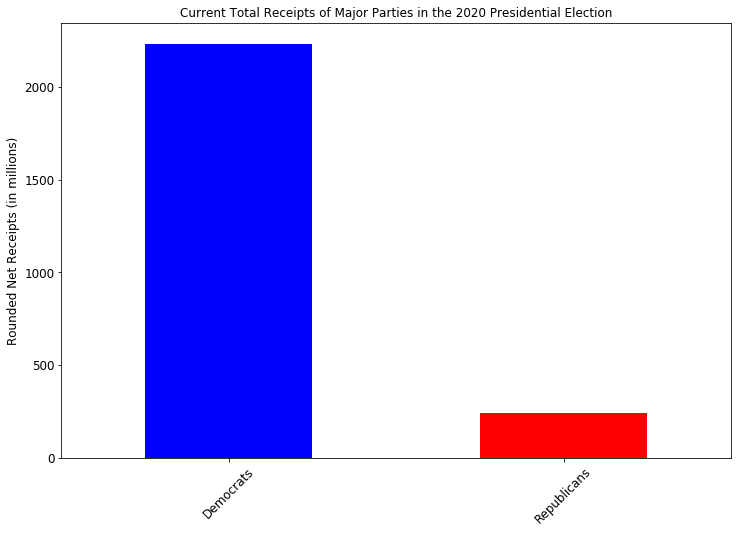

In [19]:
# plotting the major party spending in 2020
ax2 = current_overall.plot(y='rounded_net_receipts', kind='bar', legend = False, rot=45, 
                                   title='Current Total Receipts of Major Parties in the 2020 Presidential Election',
                                  figsize = (12,8), fontsize=12, color=['Blue', 'Red'])
plt.pyplot.ylabel("Rounded Net Receipts (in millions)", fontsize=12)
ax2.set_xticklabels(['Democrats', 'Republicans'])
plt.pyplot.savefig('output/maj_party_receipts_2020.png')

The above plot shows how dramatic the difference in net receipts reported in the 2020 election is between the two major parties. Democrats have out-raised the Republican party nearly eleven-to-one. 

In [20]:
# getting 2020 dem totals
current_dem = total_current_election.loc[total_current_election['candidate_party'] == 'DEM']
current_dem

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
1,P00000002,DEM,Democrats,2232.5,US
2,P00014530,DEM,Bloomberg,1049.4,US
3,P00012716,DEM,Steyer,343.2,US
6,P60007168,DEM,Sanders,211.2,US
7,P80000722,DEM,Biden,132.0,US
8,P00009621,DEM,Warren,125.8,US
10,P00010298,DEM,Buttigieg,99.9,US
13,P80006117,DEM,Klobuchar,52.8,US
16,P00009423,DEM,Harris,39.8,US
17,P00006486,DEM,Yang,39.5,US


Like the Republicans in 2016, the Democrats had a large number of candidates file to run in the primary. Some of these names might not seem familiar. The FEC keeps data on any candidate who files for an election, whether they actually end up running or not. That was the case for Richard Ojeda, who filed to run for President, but dropped out in late 2019.

In [21]:
other_dems = current_dem.loc[current_dem['rounded_net_receipts'] < 1]
other_dems

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
402,P00012567,DEM,Sestak,0.4,US
445,P00011254,DEM,Gravel,0.3,US
584,P00010827,DEM,Messam,0.1,US
601,P00008763,DEM,Ojeda,0.1,US


In fact, we see that these four candidates each raised less than one million dollars, combined.

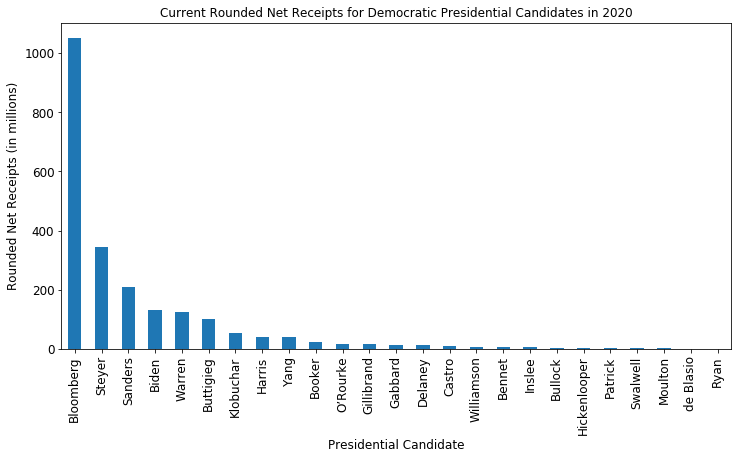

In [22]:
# plotting overall receipts by 2020 dem candidates (cutoff was candidates who raised over 1 mil)
current_dem_overall = current_dem.loc[(current_dem['contributor_state'] == 'US') & 
                                (current_dem['candidate_last_name'] != 'Democrats') &
                                     (current_dem['rounded_net_receipts'] > 1)]
current_dem_overall.plot(x = 'candidate_last_name', y = 'rounded_net_receipts', kind = 'bar', figsize=(12, 6),
                  title= 'Current Rounded Net Receipts for Democratic Presidential Candidates in 2020',
                  legend=False, fontsize=12)
plt.pyplot.ylabel("Rounded Net Receipts (in millions)", fontsize=12)
plt.pyplot.xlabel("Presidential Candidate", fontsize=12)
plt.pyplot.savefig('output/current_dem_net_receipts.png')

In [23]:
# current republican totals in 2020
current_total_repub = total_current_election.loc[total_current_election['candidate_party'] == 'REP']
current_total_repub

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
4,P00000003,REP,Republicans,243.4,US
5,P80001571,REP,Trump,240.7,US
188,P00011239,REP,Weld,2.0,US
372,P00013276,REP,Walsh,0.5,US
620,P00013649,REP,Sanford,0.1,US


The interesting thing to note about the Republican totals is that there are candidates who filed with the FEC to challenge Donald Trump. However, they have collectively raised far less (nearly 100 times less) than Donald Trump has.

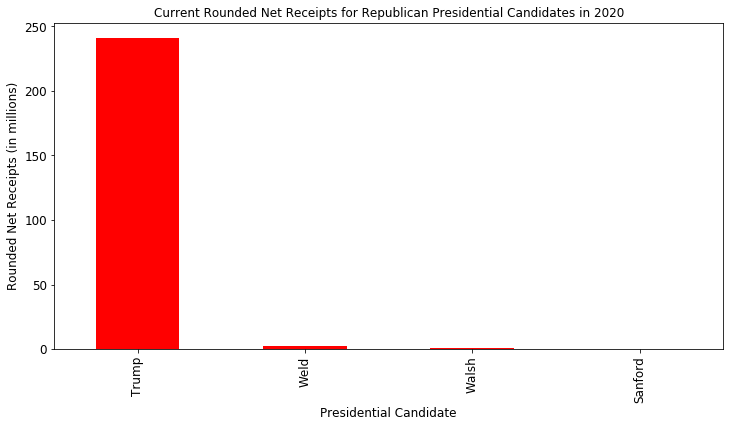

In [24]:
# plotting the overall rep totals
current_repub_overall = current_total_repub.loc[(current_total_repub['contributor_state'] == 'US') & 
                                (current_total_repub['candidate_last_name'] != 'Republicans')]
current_repub_overall.plot(x = 'candidate_last_name', y = 'rounded_net_receipts', kind='bar', figsize=(12, 6),
                  title= 'Current Rounded Net Receipts for Republican Presidential Candidates in 2020',
                  legend=False, color='Red', fontsize=12)
plt.pyplot.ylabel("Rounded Net Receipts (in millions)", fontsize=12)
plt.pyplot.xlabel("Presidential Candidate", fontsize=12)
plt.pyplot.savefig('output/current_repub_net_receipts.png')

## Part II: Voter Turnout Per State in the 2016 Presidential Election
#### Megan Chang

Now that we've seen how much each party rasied, what were the results of their fundraising on a state level? We know the overall result of the election; however we also know the result was contentious. How did the most populous states vote? Did the vote follow along specific regions, as we may assume?

In [25]:
data = pd.read_csv("Megan/1976-2016-president.csv")

data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN


In [26]:
data = data.drop(['state_po', 'state_fips', 'state_cen', 'state_ic',
                 'office', 'party', 'writein', 'totalvotes',
                 'version', 'notes'], axis=1)
data

,year,state,candidate,candidatevotes
0,1976,Alabama,"Carter, Jimmy",659170
1,1976,Alabama,"Ford, Gerald",504070
2,1976,Alabama,"Maddox, Lester",9198
3,1976,Alabama,"Bubar, Benjamin """"Ben""""",6669
4,1976,Alabama,"Hall, Gus",1954
...,...,...,...,...
3735,2016,Wyoming,NaN,6904
3736,2016,Wyoming,NaN,3224
3737,2016,Wyoming,Blank Vote,2661
3738,2016,Wyoming,"Castle, Darrell L.",2042


In [27]:
data = data.loc[data['year'] == 2016]
data

,year,state,candidate,candidatevotes
3395,2016,Alabama,"Trump, Donald J.",1318255
3396,2016,Alabama,"Clinton, Hillary",729547
3397,2016,Alabama,"Johnson, Gary",44467
3398,2016,Alabama,NaN,21712
3399,2016,Alabama,"Stein, Jill",9391
...,...,...,...,...
3735,2016,Wyoming,NaN,6904
3736,2016,Wyoming,NaN,3224
3737,2016,Wyoming,Blank Vote,2661
3738,2016,Wyoming,"Castle, Darrell L.",2042


In [28]:
data.loc[data['candidate'] == 'Trump, Donald J.', 'Candidate'] = 'Trump'
data.loc[data['candidate'] == 'Clinton, Hillary', 'Candidate'] = 'Clinton'
data.loc[(data['candidate'] != 'Trump, Donald J.') & (data['candidate'] != 'Clinton, Hillary'), 'Candidate'] = 'Independent'
data

C:\Users\Iceda\miniconda3\envs\py36\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Iceda\miniconda3\envs\py36\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,year,state,candidate,candidatevotes,Candidate
3395,2016,Alabama,"Trump, Donald J.",1318255,Trump
3396,2016,Alabama,"Clinton, Hillary",729547,Clinton
3397,2016,Alabama,"Johnson, Gary",44467,Independent
3398,2016,Alabama,NaN,21712,Independent
3399,2016,Alabama,"Stein, Jill",9391,Independent
...,...,...,...,...,...
3735,2016,Wyoming,NaN,6904,Independent
3736,2016,Wyoming,NaN,3224,Independent
3737,2016,Wyoming,Blank Vote,2661,Independent
3738,2016,Wyoming,"Castle, Darrell L.",2042,Independent


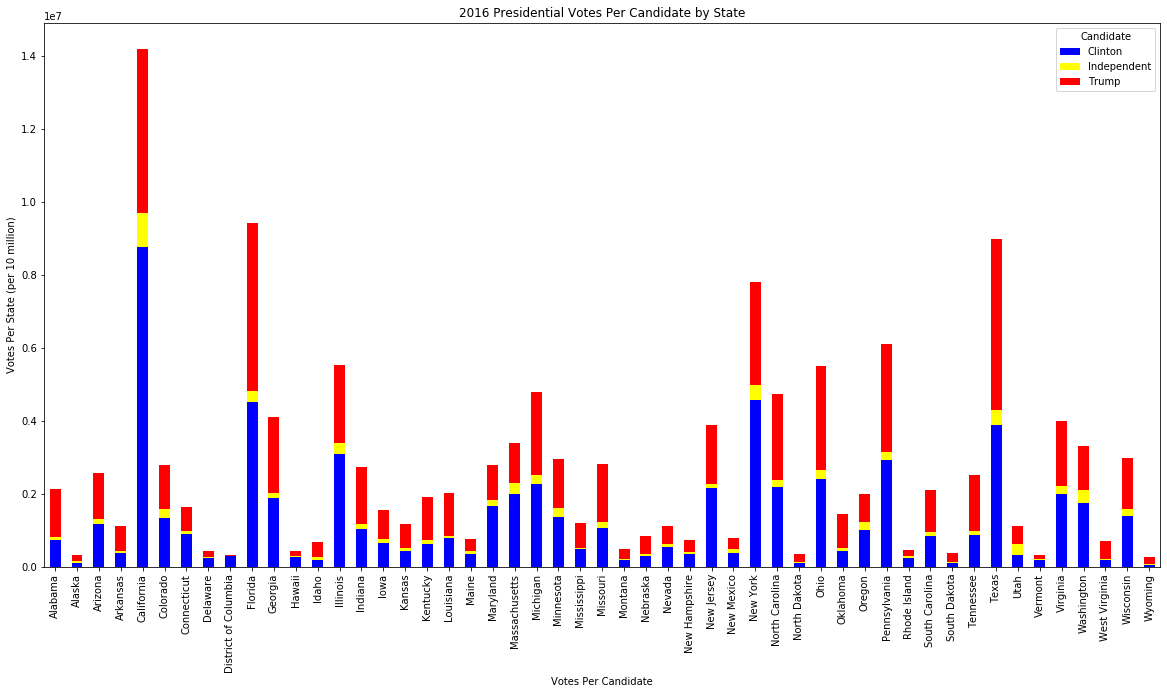

In [29]:
new_df = data.groupby(['state','Candidate'])['candidatevotes'].sum().unstack()
fig = new_df.plot(kind='bar', stacked=True, figsize=(20,10), color=['blue', 'yellow', 'red'], 
                  title = '2016 Presidential Votes Per Candidate by State')
plt.pyplot.title('2016 Presidential Votes Per Candidate by State')
plt.pyplot.xlabel('Votes Per Candidate')
plt.pyplot.ylabel('Votes Per State (per 10 million)')
plt.pyplot.savefig('plot.png')
##plt.show()

The plot above shows the number of votes each candidate received in the 2016 election by state (including Washington, DC). We can see that Hillary Clinton took the majority of votes in some of the more populous states such as California, New York, and Illinois. In addition, we see that Independent candidates did fairly well in California as well, though in the smaller populated states Independents did not do as well. 

We see Trump took the majority of votes in Southern States, as is expected in national elections. We also see key states in the Electoral College such as Ohio going for Trump as well, which played the key reason for his victory. We see, though, the range of votes between Clinton and Trump is narrow in many of these states, such as the afformentioned Ohio results, and results from Pennsylvania and even Georgia.

# Part III: A Look At Rounded Net Receipts By State

Nicholas Prentkowski

Is there a discrepancy between states when it comes to the amount of money contributed by inviduals and formal instituions to presidential candidates? I followed the money spent by Democractic and Repubican candidate's advocates to answer this question. Additionally, I took it a step further by creating two specific bar plots with a honed focus. The first sheds light on the question everyone is asking themselves: "Which states did Donald Trump's contributions come from and how much came from each state individually to help fund his campaign to victory during the 2016 general election?" Moreover, I answered the same question about contributions made to Hillary Clinton during her historic attempt to realize the coveted priviledge to call 1600 Pennsylvania Avenue home. 

In [30]:
# Create a data frame out of the data from the csv 
presidential_votes_df = pd.DataFrame(presidential_votes_data)

# Rename stat_po column to match your other df
presidential_votes_df.rename(columns = {'state_po':'contributor_state'}, inplace = True)

In [31]:
# Show new data frame
presidential_votes_df

,year,state,contributor_state,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,2016,Wyoming,WY,56,83,68,US President,NaN,NaN,True,6904,258788,20171015,NaN
3736,2016,Wyoming,WY,56,83,68,US President,NaN,independent,False,3224,258788,20171015,NaN
3737,2016,Wyoming,WY,56,83,68,US President,Blank Vote,NaN,False,2661,258788,20171015,NaN
3738,2016,Wyoming,WY,56,83,68,US President,"Castle, Darrell L.",constitution party,False,2042,258788,20171015,NaN


In [32]:
# Make a list of the initials of all 50 states
state_list = ["AL", "AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI",
              "MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX",
             "UT","VT","VA","WA","WV","WI","WY"]

In [33]:
# Use isin function to extract data only pertaining to 50 states and create new df
pres_finance_states=pres_finance["contributor_state"].isin(state_list)
pres_finance[pres_finance_states]
states_df = pd.DataFrame(pres_finance[pres_finance_states])

In [34]:
# Show new df
states_df

,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts,contributor_state
6,P00000001,None,All candidates,172.0,NY
7,P00000002,DEM,Democrats,153.9,NY
8,P00000001,None,All candidates,152.3,CA
9,P00003392,DEM,Clinton,145.2,NY
10,P00000002,DEM,Democrats,114.5,CA
...,...,...,...,...,...
1582,P60007697,REP,Graham,0.0,ME
1586,P20003281,REP,Perry,0.0,UT
1587,P20003281,REP,Perry,0.0,MD
1589,P80003478,REP,Huckabee,0.0,VT


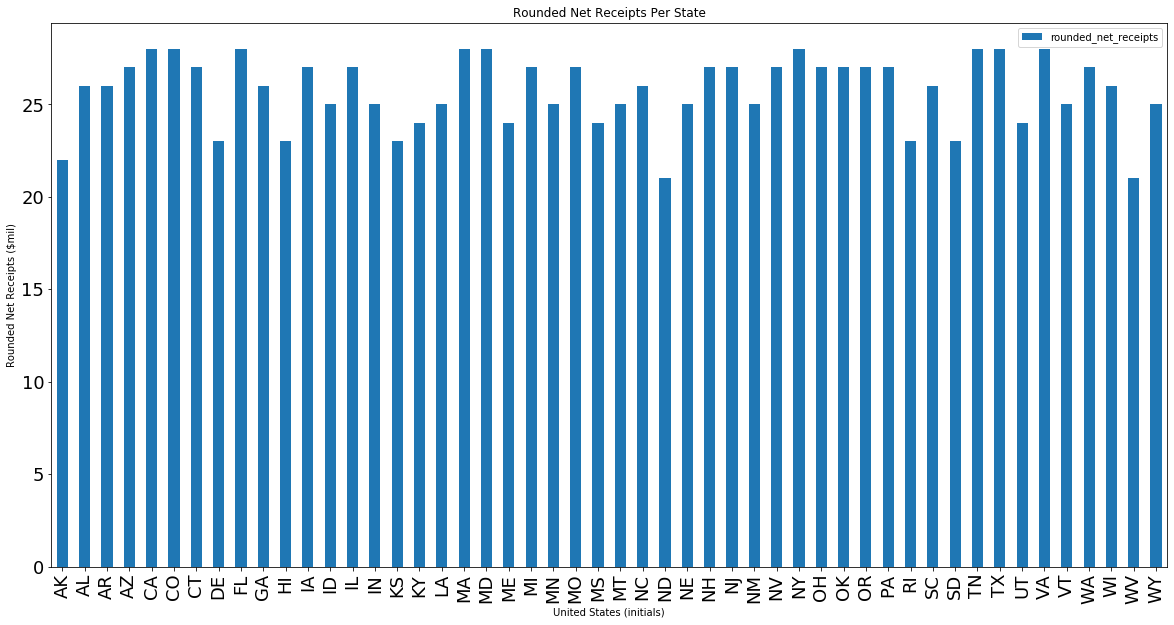

In [35]:
# Use groupby function to group the contributor states and the count function to count the rounded net receipts
states_receipts = states_df.groupby("contributor_state").count()["rounded_net_receipts"]

# Create a new df for the bar plot
pyplot_bar_United_States = pd.DataFrame(states_receipts)

# Create bar plot using plot function and establishing bar. Widen plot. Increase font size for easier viewing.
# Label x and y-axis. Give plot a title and export the visual
also = pyplot_bar_United_States.plot(kind='bar', stacked=True, figsize=(20,10), fontsize=18)
also
plt.pyplot.xlabel("United States (initials)")
plt.pyplot.ylabel("Rounded Net Receipts ($mil)")
plt.pyplot.title("Rounded Net Receipts Per State")
plt.pyplot.savefig("output/pyplot_bar_United_States")


The bar plot above shows the the total amount of money contributed to both Clinton and Trump for use in their 2016 presidential bid. Each bar represents one of the fifty U.S. states and the total amount of money coming from individuals and institutions from the state in question. I hypothesized that a state's tax revenue per capita directly influences the amount of financial support coming out of that state to political candidates, but the bar plots I created show that this is not always true. For instance, according to the Tax Policy Center, Mississippi and Arkansas were towards the bottom of the list when it came to the amount of tax revenue it was getting per capita. Respectively, the figures were \\$3,609 and \\$3,955 during 2016. However, in total, they contributed a noteworthy amount of money to Clinton and Trump: respectively, \\$23mil and \\$27mil. North Dakota, on the other hand, donated \\$22mil, in total, to both candidates. Considering the state's tax revenue per capita during the year of 2016 was \\$6,640, it is not as large of a dollar amount as I would expect to be coming out of the state. Conversely, Conneticut and Minnesota were among the top tier when it came to tax revenue per capita in 2016. Respectively, the figures were \\$7,239 and \\$6,092. Their respective presidential contributions were ~\\$27 mil and ~\\$24 mil, which means another one of our union's less economically successful states, Lousiana, was just tailing them with an aproximate contribution of \\$24 mil. That is a substantial figure when considering the state only saw \\$3,894 of tax revenue per capita during the same year.

In [36]:
# Combine the presidential_votes_df and states_df
combined_df = pd.merge(presidential_votes_df,states_df, on=("contributor_state"))

# Show new df
combined_df

,year,state,contributor_state,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN,P00000001,None,All candidates,6.4
1,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN,P00000003,REP,Republicans,4.2
2,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN,P00000002,DEM,Democrats,2.2
3,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN,P80001571,REP,Trump,2.0
4,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN,P00003392,DEM,Clinton,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94465,2016,Wyoming,WY,56,83,68,US President,Over Vote,NaN,False,278,258788,20171015,NaN,P80003379,REP,Gilmore,0.0
94466,2016,Wyoming,WY,56,83,68,US President,Over Vote,NaN,False,278,258788,20171015,NaN,P20003984,GRE,Stein,0.0
94467,2016,Wyoming,WY,56,83,68,US President,Over Vote,NaN,False,278,258788,20171015,NaN,P60022654,IND,McMullin,0.0
94468,2016,Wyoming,WY,56,83,68,US President,Over Vote,NaN,False,278,258788,20171015,NaN,P60009685,DEM,Lessig,0.0


In [37]:
# Use loc function to extract data pertaining to Clinton
total_clinton = combined_df.loc[combined_df['candidate']=="Clinton, Hillary"]

# show df
total_clinton

,year,state,contributor_state,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts
1534,2016,Alabama,AL,1,63,41,US President,"Clinton, Hillary",democrat,False,729547,2123372,20171015,NaN,P00000001,None,All candidates,6.4
1535,2016,Alabama,AL,1,63,41,US President,"Clinton, Hillary",democrat,False,729547,2123372,20171015,NaN,P00000003,REP,Republicans,4.2
1536,2016,Alabama,AL,1,63,41,US President,"Clinton, Hillary",democrat,False,729547,2123372,20171015,NaN,P00000002,DEM,Democrats,2.2
1537,2016,Alabama,AL,1,63,41,US President,"Clinton, Hillary",democrat,False,729547,2123372,20171015,NaN,P80001571,REP,Trump,2.0
1538,2016,Alabama,AL,1,63,41,US President,"Clinton, Hillary",democrat,False,729547,2123372,20171015,NaN,P00003392,DEM,Clinton,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94315,2016,Wyoming,WY,56,83,68,US President,"Clinton, Hillary",democrat,False,55973,258788,20171015,NaN,P80003379,REP,Gilmore,0.0
94316,2016,Wyoming,WY,56,83,68,US President,"Clinton, Hillary",democrat,False,55973,258788,20171015,NaN,P20003984,GRE,Stein,0.0
94317,2016,Wyoming,WY,56,83,68,US President,"Clinton, Hillary",democrat,False,55973,258788,20171015,NaN,P60022654,IND,McMullin,0.0
94318,2016,Wyoming,WY,56,83,68,US President,"Clinton, Hillary",democrat,False,55973,258788,20171015,NaN,P60009685,DEM,Lessig,0.0


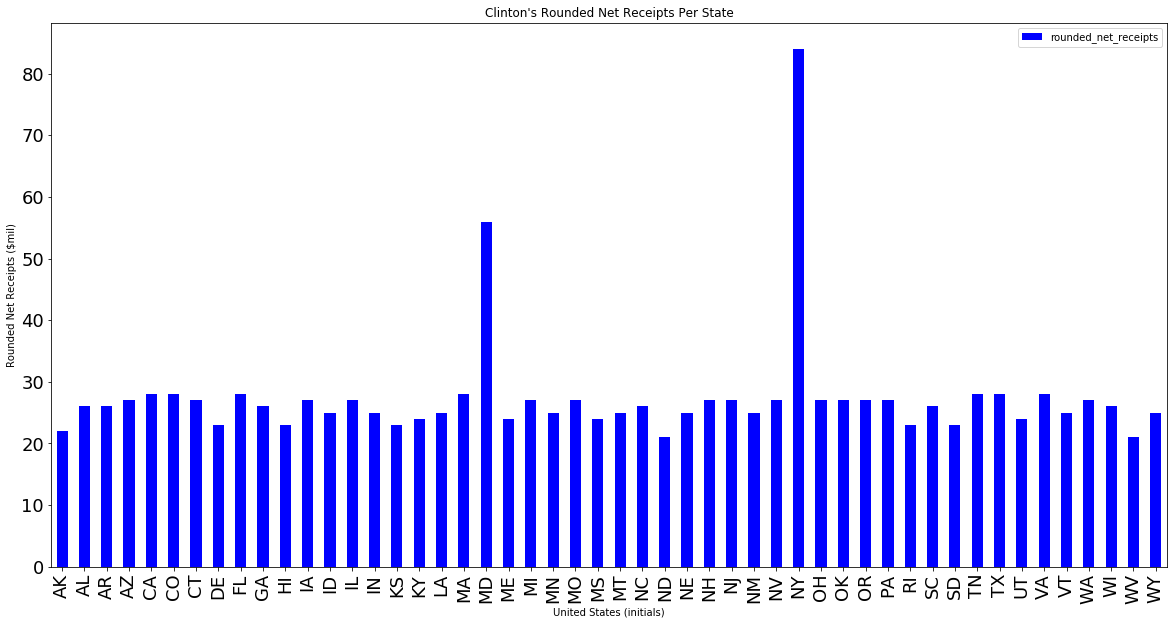

In [38]:
# Use group by function to group by contributor state and use count function to sum rounded net receipts
clinton_df = total_clinton.groupby("contributor_state").count()["rounded_net_receipts"]
# Create new df with the data derived from the code above
pyplot_bar_clinton = pd.DataFrame(clinton_df)

# Use plot function and specify bar to create a bar plot. Make visual wider, increase font size and make blue more vibrant
# Label x and y-axis. Give plot a title. Use savefig to export and save the visual
also = pyplot_bar_clinton.plot(kind='bar', stacked=True, figsize=(20,10), fontsize=18, color = "b")
also
plt.pyplot.xlabel("United States (initials)")
plt.pyplot.ylabel("Rounded Net Receipts ($mil)")
plt.pyplot.title("Clinton's Rounded Net Receipts Per State")
plt.pyplot.savefig("output/pyplot_bar_clinton_net_receipts_per_state")

In [39]:
# Use loc function to extract data pertaining to Trump
total_trump = combined_df.loc[combined_df['candidate']=="Trump, Donald J."]

# Show data 
total_trump

,year,state,contributor_state,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes,candidate_id,candidate_party,candidate_last_name,rounded_net_receipts
1508,2016,Alabama,AL,1,63,41,US President,"Trump, Donald J.",republican,False,1318255,2123372,20171015,NaN,P00000001,None,All candidates,6.4
1509,2016,Alabama,AL,1,63,41,US President,"Trump, Donald J.",republican,False,1318255,2123372,20171015,NaN,P00000003,REP,Republicans,4.2
1510,2016,Alabama,AL,1,63,41,US President,"Trump, Donald J.",republican,False,1318255,2123372,20171015,NaN,P00000002,DEM,Democrats,2.2
1511,2016,Alabama,AL,1,63,41,US President,"Trump, Donald J.",republican,False,1318255,2123372,20171015,NaN,P80001571,REP,Trump,2.0
1512,2016,Alabama,AL,1,63,41,US President,"Trump, Donald J.",republican,False,1318255,2123372,20171015,NaN,P00003392,DEM,Clinton,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94290,2016,Wyoming,WY,56,83,68,US President,"Trump, Donald J.",republican,False,174419,258788,20171015,NaN,P80003379,REP,Gilmore,0.0
94291,2016,Wyoming,WY,56,83,68,US President,"Trump, Donald J.",republican,False,174419,258788,20171015,NaN,P20003984,GRE,Stein,0.0
94292,2016,Wyoming,WY,56,83,68,US President,"Trump, Donald J.",republican,False,174419,258788,20171015,NaN,P60022654,IND,McMullin,0.0
94293,2016,Wyoming,WY,56,83,68,US President,"Trump, Donald J.",republican,False,174419,258788,20171015,NaN,P60009685,DEM,Lessig,0.0


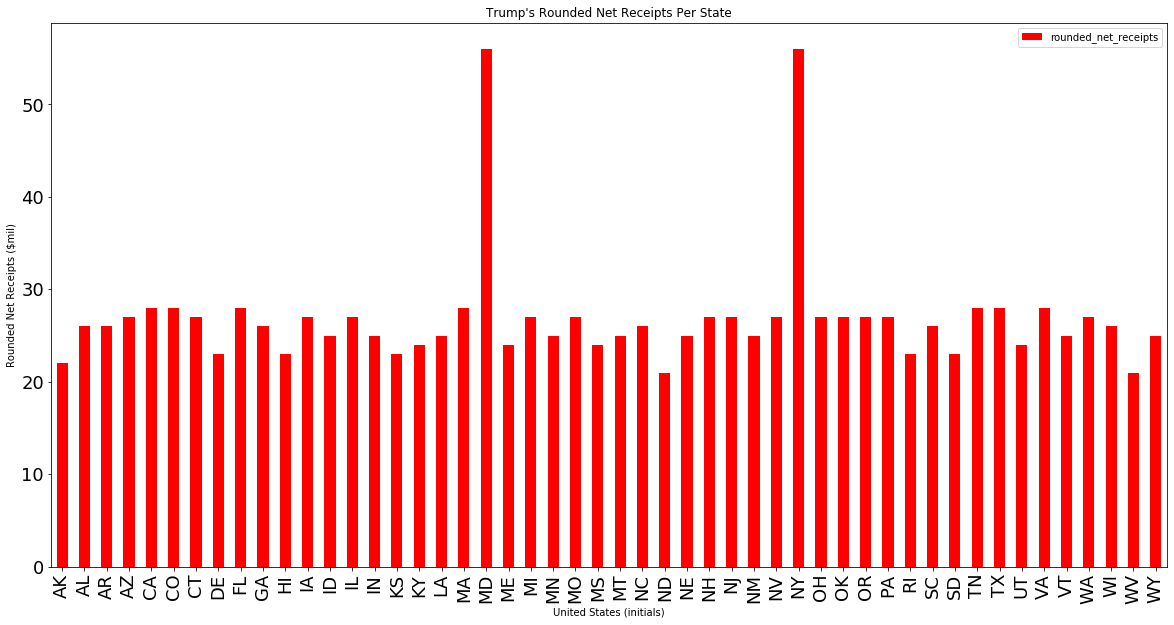

In [40]:
# Use groupby to groupby function contributor state and use count function to sum rounded net receipts 
trump_df = total_trump.groupby("contributor_state").count()["rounded_net_receipts"]
# Create a new df
pyplot_bar_trump = pd.DataFrame(trump_df)

# USe plot function and specify bar to create a bar plot. Increase width of visual. Inrease font and make bars vibrant red
# Label x and y-axis. Give plot a tite. Save and export file using savefig function
also = pyplot_bar_trump.plot(kind='bar', stacked=True, figsize=(20,10), fontsize=18, color = "r")
also
plt.pyplot.xlabel("United States (initials)")
plt.pyplot.ylabel("Rounded Net Receipts ($mil)")
plt.pyplot.title("Trump's Rounded Net Receipts Per State")
plt.pyplot.savefig("output/pyplot_bar_trump_net_receipts_per_state")

This plot is showing the amount of money contributed to Trump, by state, during the 2016 election. Once again, we see that Maryland donated a handsome sum of ~\\$57 mil and this is true for the same reasons Clinton saw so much money from the generous state. New York, home to the Trump empire, also donate ~\\$57mil, which is a far cry from the ~\\$87mil that Clinton got from the state she represented in the senate. Condisering New York is notoriously a blue state, it is no wonder why Trump could not raise as much money as Clinton from the third largest state, in respect to the electoral college.